# Preprocessing of the CT Scan Data

In [88]:
from importlib import reload
import utils3d
reload(utils3d)
from utils3d import *
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [2]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/CT_scans/'

In [3]:
raw_folder, scan_lst, etc_files = next(os.walk(path+'raw'))

In [8]:
scan_lst.sort()

In [12]:
scan_lst = scan_lst[:10]

In [13]:
scan_lst

['s17313',
 's19382',
 's25054',
 's25080',
 's25223',
 's25426',
 's26218',
 's26696',
 's26984',
 's27029']

In [15]:
x_spacing = []
y_spacing = []
z_spacing = []
x_dim = []
y_dim = []
z_dim = []

In [18]:
for scan in scan_lst:
    scan_path = os.path.join(raw_folder, scan)
    ndarray = dcm_to_ndarray(scan_path, target_size=(256, 256, 192))
    np.save(path+'ndarray/'+scan+'.npy', ndarray)
    meta = get_metadata(scan_path)
    x_spacing.append(meta['x_spacing'])
    y_spacing.append(meta['y_spacing'])
    z_spacing.append(meta['z_spacing'])
    x_dim.append(meta['x_dim'])
    y_dim.append(meta['y_dim'])
    z_dim.append(meta['z_dim'])

/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [26]:
meta_df = pd.DataFrame(dict(ID=scan_lst, x_spacing=x_spacing, y_spacing=y_spacing, z_spacing=z_spacing, x_dim=x_dim, 
                            y_dim=y_dim, z_dim=z_dim))

In [27]:
meta_df

,ID,x_dim,x_spacing,y_dim,y_spacing,z_dim,z_spacing
0,s17313,512,0.703125,512,0.703125,191,2.500
1,s19382,512,0.664062,512,0.664062,421,1.250
2,s25054,512,0.664062,512,0.664062,173,2.500
3,s25080,512,0.742188,512,0.742188,180,2.500
4,s25223,512,0.742188,512,0.742188,863,0.625
5,s25426,512,0.683594,512,0.683594,739,0.625
6,s26218,512,0.781250,512,0.781250,796,0.625
7,s26696,512,0.625000,512,0.625000,800,0.625
8,s26984,512,0.703125,512,0.703125,85,5.000
9,s27029,512,0.781250,512,0.781250,785,0.625


In [93]:
meta_df.to_csv('./meta_data.csv')

## Visualization

In [95]:
scan = 's26984'
meta = get_metadata(path+'raw/'+scan)
#ndarray = np.load(path+'ndarray/'+scan+'.npy')

In [96]:
ndarray = dcm_to_ndarray(path+'raw/'+scan, target_size=(256, 256, 192))

In [97]:
x = np.linspace(0, (meta['x_dim']+1)*meta['x_spacing'], num = 256)
y = np.linspace(0, (meta['y_dim']+1)*meta['y_spacing'], num = 256)
z = np.linspace(0, (meta['z_dim']+1)*meta['z_spacing'], num = 192)

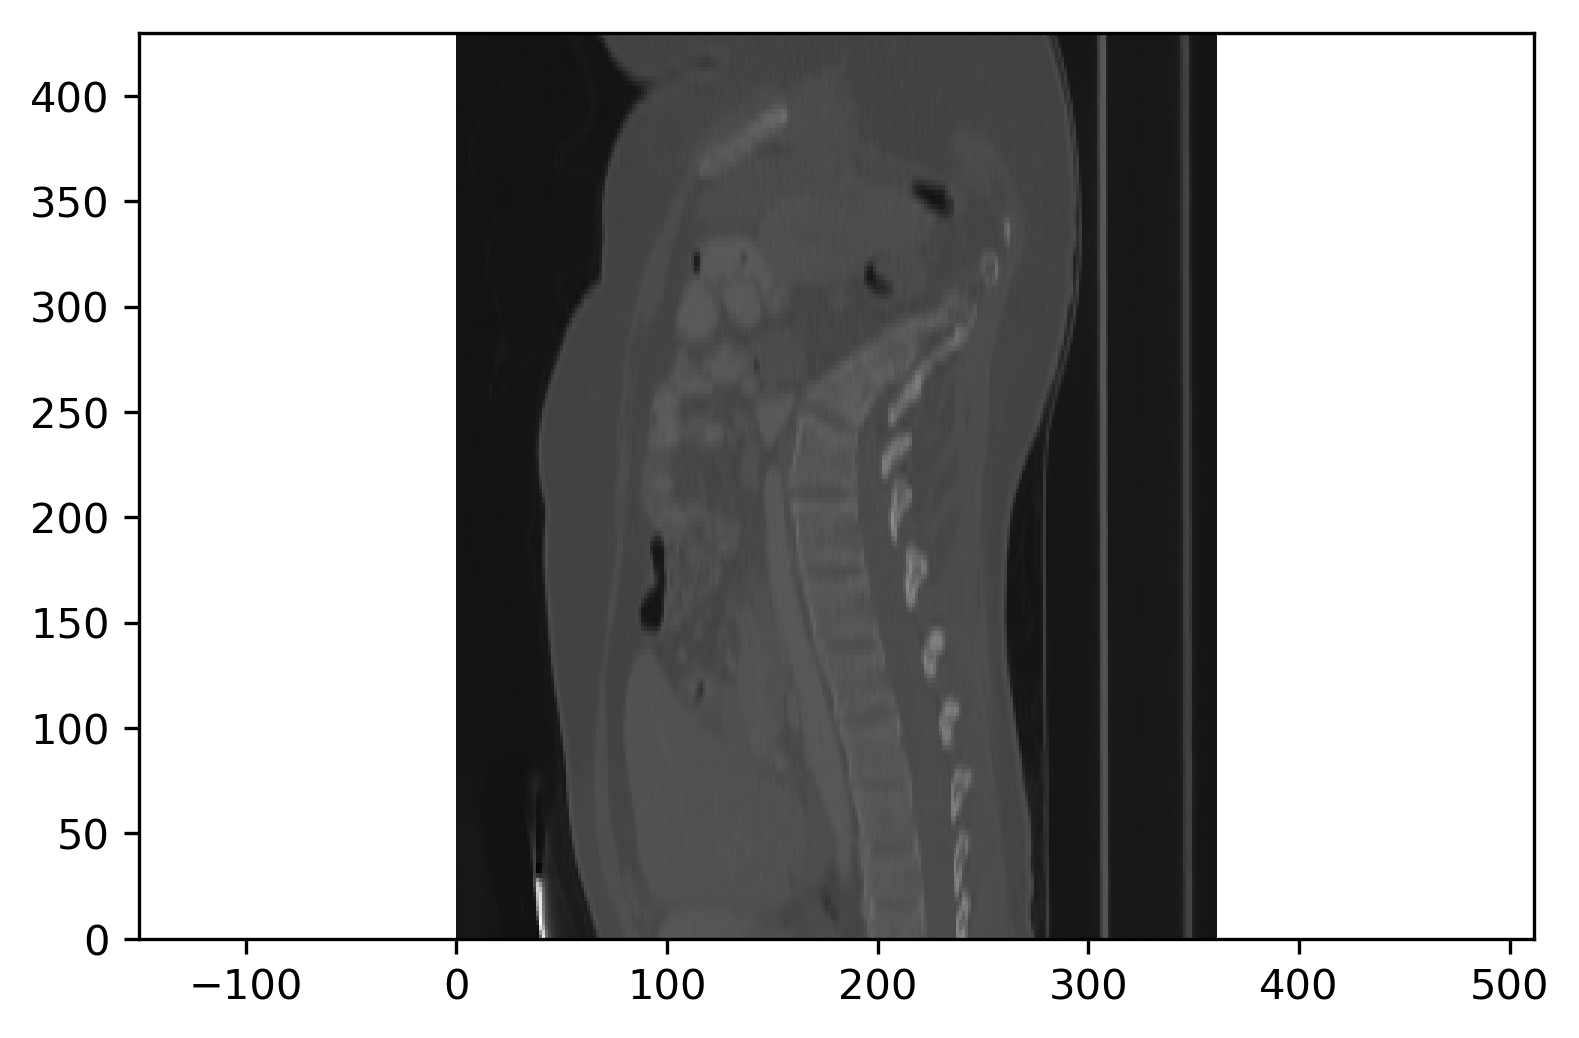

In [98]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, z, np.transpose(ndarray[:, 128, :]));